Reading CSV to DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.drop(columns='Id', inplace=True)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(3)

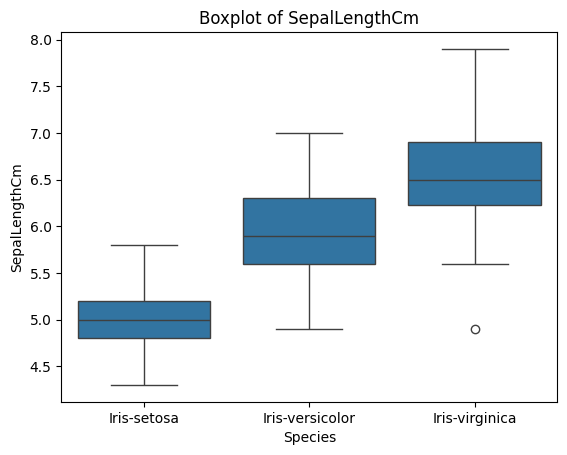

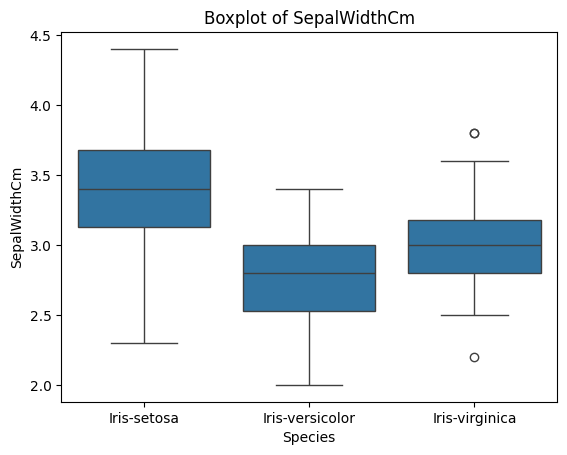

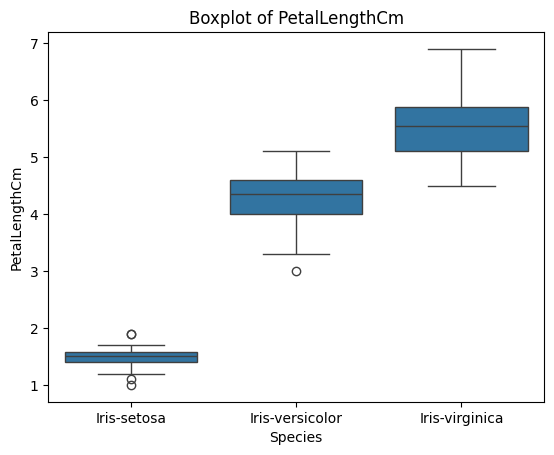

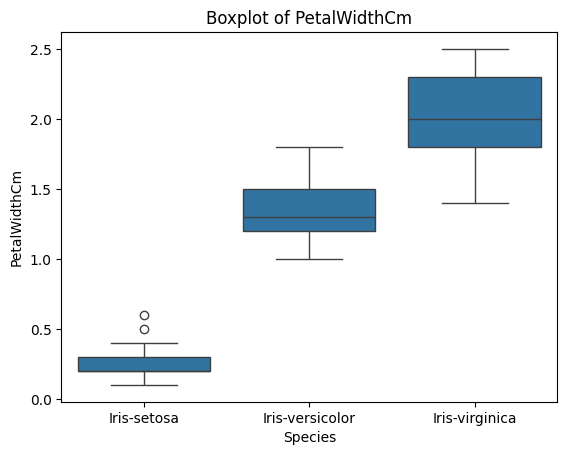

In [9]:
for i in df:
    if df[i].dtype in ['float','int']:
        sns.boxplot(y=df[i], x=df['Species'])
        plt.title(f"Boxplot of {i}")
        plt.show()

In [10]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder is a Class. Therefore create an object of this class.
le=LabelEncoder()  # created object le

In [12]:
df['Species']=le.fit_transform(df['Species']) # converted each categories inside that column to numerical values
df                                            # and assigned it to the respective column  
                                              # Also note the column containing labels should be a series (1D data)
                                              # Which means only one column can be encoded at a time using Label encoder.  

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
le.inverse_transform([0,1,2]) # Verifying the encoding by decoding

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Scaling Techniques- Normalization & Standardization

*1. Normalization(Min-Max Scaler) Technique:*

    x_scaled = x_current - x_min/ x_max-x_min

    y_scaled = y_current - y_min/ y_max-y_min

*2. Standardization Technique:*

    x_scaled = x_current-mean/std



In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax=MinMaxScaler()
s_s=StandardScaler()

In [16]:
x=df.drop(columns='Species')
y=df['Species']

In [23]:
x_scaled1=minmax.fit_transform(x)
x_scaled2=s_s.fit_transform(x)

In [25]:
x_scaled1.max() # Using min-max scaler

np.float64(1.0)

In [26]:
x_scaled2.max() # Using standard scaler

np.float64(3.1146839106774356)

In [27]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
data=[[5.1,3.7,1.6,0.2]]  # Trying to add new features to the model.
np.array(data).shape

(1, 4)

In [30]:
minmax.transform(data)  # Do not use fit_transform since that will erase the min & max values learned by
                        # the model with the original dataset. With transform we're using min & max values
                        # from original model to transform or normalize the new data.

c:\Users\ajayk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.22222222, 0.70833333, 0.10169492, 0.04166667]])

Data Splitting ( Train & Test )

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled1,y,test_size=0.3) # test size is 30%

In [33]:
x_train.shape

(105, 4)

In [36]:
x_test.shape

(45, 4)

In [35]:
y_train.shape

(105,)

In [37]:
y_test.shape

(45,)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train) 

KNeighborsClassifier()

Model Evaluation

In [44]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred=model.predict(x_test)
y_pred

array([1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2,
       2])

In [41]:
y_test.values

array([1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2,
       2])

In [52]:
print(round(accuracy_score(y_test, y_pred)*100,2),"%",sep=' ')

91.11 %
